# Cleaning US Census Data

This project is another Codecademy project focusing on data cleaning. In this project, you are put in an imagined scenario in which you are a hired Data Analyst for the Census Bureau, with the job of creating visualisations for current and former census data using pandas.

All of the data is found in separate csv files by state.

## Section 1 - Inspect the Data

### Task 1:

The first visualisation to be made is a scatterplot that shows average income in a state vs the proportion of women in that state.

It will be easier to inspect the data once it is in a dataframe. Using `glob`, loop through the census files and load them into dataframes. Then, concatenate those dataframes into one dataframe, called `us_census`

In [16]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import glob
import re

files = glob.glob("states*.csv")

df_list = []
for filename in files:
  data = pd.read_csv(filename)
  df_list.append(data)

us_census = pd.concat(df_list)

### Task 2

Look at the column types (`.columns`) and the `.dtypes` of the `us_census` dataframe to check if any of the datatypes would hinder your analysis.

In [17]:
us_census.columns
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

### Task 3

Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

Start to make a plan for how to convert these columns into the right types for manipulation.

In [18]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,"$59,125.27",510388M_543273F
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,"$46,296.81",2322409M_2455167F
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,"$51,805.41",423477M_419713F
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,"$47,328.08",3167756M_3331859F
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,"$55,874.52",13171316M_13367298F


## Section 2 - Regex to the Rescue

### Task 4
Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [19]:
for index in range(0, len(us_census['Income'])):
    string = str(us_census['Income'].iat[index])
    string = string.replace('$', '')
    string = string.replace(',', '')
    us_census['Income'].iat[index] = string
us_census["Income"] = pd.to_numeric(us_census["Income"])

us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F


### Task 5

Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

Split the column into those two new columns using `str.split` and separating out those results.

In [20]:
Men = []
Women = []

for index in range(0, len(us_census['GenderPop'])):
    item = str(us_census['GenderPop'].iat[index])
    pops = item.split('_')
    Men.append(pops[0])
    Women.append(pops[1])

us_census["Men"] = Men
us_census["Women"] = Women

us_census["Women"]

0      543273F
1     2455167F
2      419713F
3     3331859F
4    13367298F
5     1444150F
0     1444150F
1      318031F
2     4195682F
3     3497739F
4      937789F
5     2890732F
0            F
1     3455936F
2     5038598F
3     2727005F
4     1536358F
5     3081445F
0     3081445F
1            F
2      939759F
3     1390901F
4      670717F
5     4561386F
0     5913084F
1     1942789F
2     1990780F
3     6534215F
4     1869213F
5      543273F
0     4561386F
1     1051703F
2    10131373F
3     5049925F
4      353677F
5     5913084F
0     5123362F
1      696428F
2      806083F
3     6556862F
4     3333382F
5     1558931F
0     1558931F
1     1453125F
2     2233145F
3     2364097F
4      679019F
5            F
0     2630239F
1     1841615F
2      478041F
3      340810F
4    10045763F
5     5123362F
0     2489527F
1      349215F
2     3342840F
3     1506295F
4    19334329F
5     2630239F
Name: Women, dtype: object

### Task 6

Convert both of the columns into numerical datatypes.

There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [21]:
for index in range(0, len(us_census["Men"])):
    men = str(us_census["Men"].iat[index])
    men = men.replace("M", "")
    us_census["Men"].iat[index] = men
us_census["Men"] = pd.to_numeric(us_census["Men"])

for index in range(0, len(us_census["Women"])):
    women = str(us_census["Women"].iat[index])
    women = women.replace("F", "")
    us_census["Women"].iat[index] = women
us_census["Women"] = pd.to_numeric(us_census["Women"])

### Task 7

Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!
Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
Remember to call `plt.show()` to see the graph!

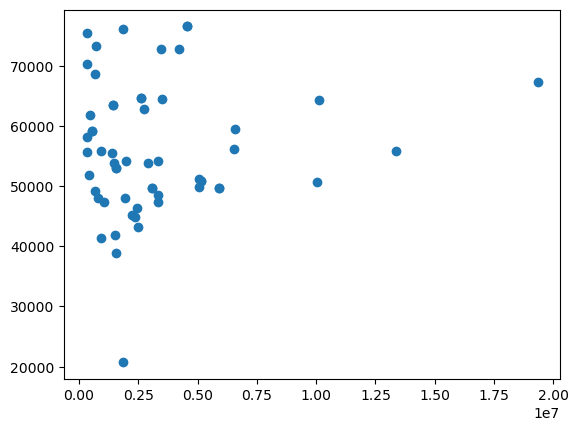

In [22]:
plt.scatter(us_census["Women"], us_census["Income"])
plt.show()

### Task 8

You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
Print out the `Women` column after filling the `nan` values to see if it worked!
   

In [23]:
us_census["Women"] = us_census["Women"].fillna(us_census["TotalPop"] - us_census["Men"])
print(us_census["Women"])

0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
0     3057895.0
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1      504536.0
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5     3057895.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
Name: Women, dtype: float64


### Task 9

We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [24]:
us_census.duplicated(subset = us_census.columns[1:])

0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5     True
0     True
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

### Task 10
Drop those duplicates using the `.drop_duplicates()` function.

In [25]:
us_census = us_census.drop_duplicates(subset = us_census.columns[1:])

### Task 11

Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

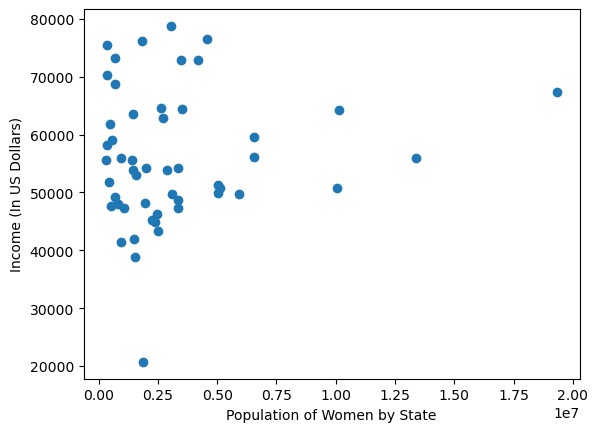

<Figure size 640x480 with 0 Axes>

In [26]:
plt.scatter(us_census["Women"], us_census["Income"])
plt.ylabel("Income (In US Dollars)")
plt.xlabel("Population of Women by State")
plt.show()
plt.clf()

## Section 3 - Histogram of Races

### TNow your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [190]:
print(us_census.columns)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')


14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

/var/folders/yc/4vl_yxks1714bcrl1ft5w0cm0000gn/T/ipykernel_54127/1003137869.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13.36' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  us_census[race].iat[index] = replace
/var/folders/yc/4vl_yxks1714bcrl1ft5w0cm0000gn/T/ipykernel_54127/1003137869.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '74.33' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  us_census[race].iat[index] = replace
/var/folders/yc/4vl_yxks1714bcrl1ft5w0cm0000gn/T/ipykernel_54127/1003137869.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.68' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  

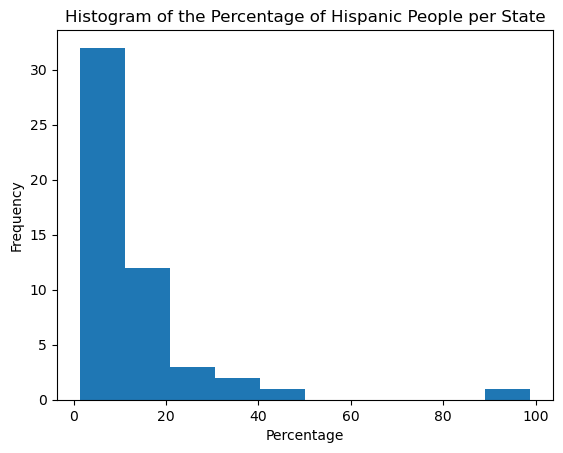

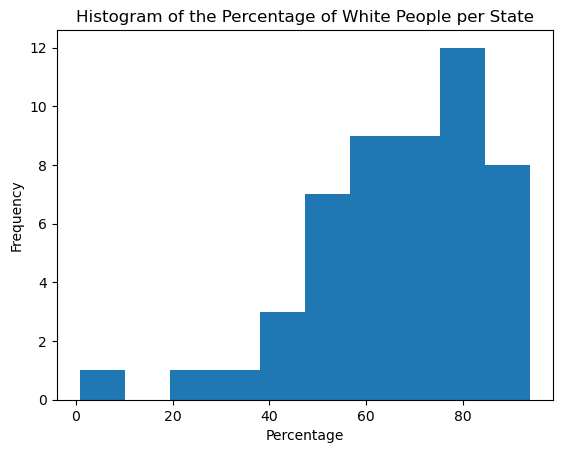

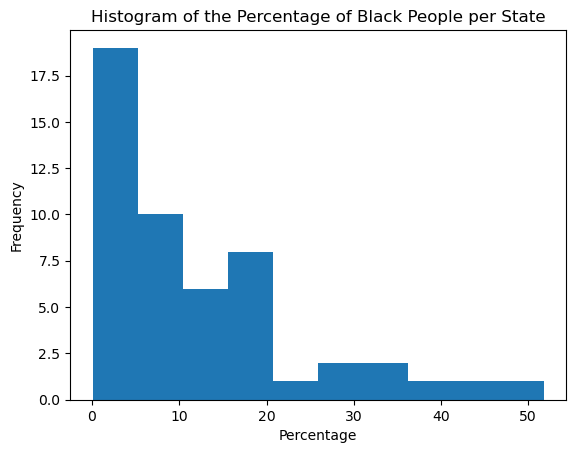

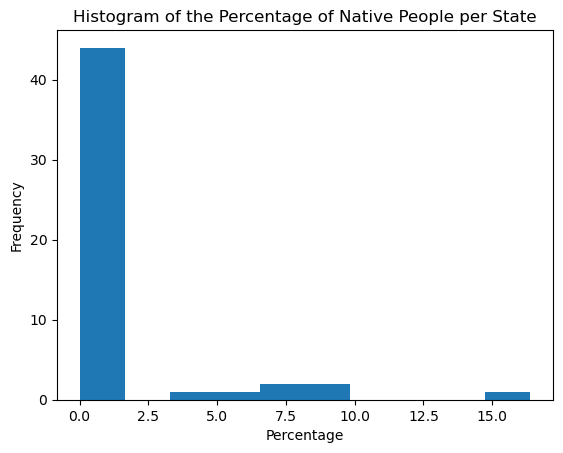

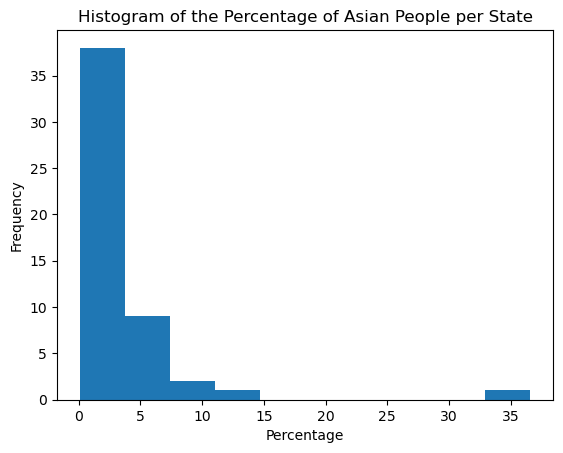

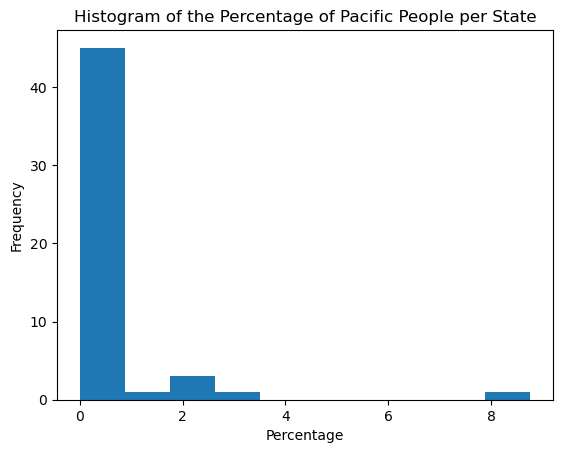

<Figure size 640x480 with 0 Axes>

In [211]:
for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    for index in range(0,len(us_census)):    
        string = str(us_census[race].iat[index])
        replace = string.replace('%', '')
        if (replace == "nan"):
            replace = ""
        us_census[race].iat[index] = replace
    us_census[race] = pd.to_numeric(us_census[race])
    
us_census['Pacific'] = us_census['Pacific'].fillna(100 - us_census['Hispanic'] - us_census['White'] - us_census['Black'] - us_census['Native'] - us_census['Asian'])

census = us_census.drop_duplicates(subset = us_census.columns[1:])
census

for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    plt.hist(census[race])
    plt.title("Histogram of the Percentage of {} People per State".format(race))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()